在这之前先读取10X数据

In [5]:
library(Seurat)
library(dplyr)
library(patchwork)
# library(readr)
library(ggplot2)
#有云服务器的，可开启并运算，这里我用4个线程：
library(future)
library(qs)
# check the current active plan
plan()
# change the current plan to access parallelization
plan("multisession", workers =40)
plan()

#设置可用的内存
# options(future.globals.maxSize = 4 * 1024^3)
plan("sequential")
future::plan()

qs 0.27.3. Announcement: https://github.com/qsbase/qs/issues/103



sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan(sequential)
FutureBackend to be launched

multisession:
- args: function (..., workers = 40)
- tweaked: TRUE
- call: plan("multisession", workers = 40)
MultisessionFutureBackend:
Inherits: ClusterFutureBackend, MultiprocessFutureBackend, FutureBackend
UUID: fffc8dd2b7e96539dc0ec7ea34ed788e
Number of workers: 40
Number of free workers: 40
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘rscript_libs’: "/home/guoliming/micromamba/envs/R4.4.3/lib/R/library"
Argument ‘persistent’: FALSE
Argument ‘wait.timeout’: 86400
Argument ‘wait.interval’: 0.01
Argument ‘wait.alpha’: 1.01
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)
Workers of type RichSOCKcluster:
- Summary: Socket cluster with 40 nodes on host ‘localhost’ (R version 4.4.3 (2025-02-28), platform x86_64-conda-linux-gnu)
- [ OK ] Node 1/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41375 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #5 ('<-localhost:11966')]
- [ OK ] Node 2/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41364 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #6 ('<-localhost:11966')]
- [ OK ] Node 3/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41348 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #7 ('<-localhost:11966')]
- [ OK ] Node 4/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41363 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #8 ('<-localhost:11966')]
- [ OK ] Node 5/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41362 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #9 ('<-localhost:11966')]
- [ OK ] Node 6/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41342 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #10 ('<-localhost:11966')]
- [ OK ] Node 7/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41353 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #11 ('<-localhost:11966')]
- [ OK ] Node 8/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41376 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #12 ('<-localhost:11966')]
- [ OK ] Node 9/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41352 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #13 ('<-localhost:11966')]
- [ OK ] Node 10/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41367 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #14 ('<-localhost:11966')]
- [ OK ] Node 11/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41343 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #15 ('<-localhost:11966')]
- [ OK ] Node 12/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41356 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #16 ('<-localhost:11966')]
- [ OK ] Node 13/40: valid connection, alive [RichSOCKnode of a socket cluster on local host 'localhost' with pid 41366 (R version 4.4.3 (2025-02-28), x86_64-conda-linux-gnu) using socket connection #17 ('<-localhost:11966')]
- [ OK ] Node 14/40: valid connection, alive [RichSOCKnode of a

sequential:
- args: function (..., envir = parent.frame(), workers = "<NULL>")
- tweaked: FALSE
- call: plan("sequential")
SequentialFutureBackend:
Inherits: FutureBackend
UUID: 8c529c98489f03ff0da32ceb6058467c
Number of workers: 1
Number of free workers: 1
Available cores: 80
Automatic garbage collection: FALSE
Early signaling: FALSE
Interrupts are enabled: TRUE
Maximum total size of globals: +Inf
Maximum total size of value: +Inf
Argument ‘hooks’: FALSE
Number of active futures: 0
Number of futures since start: 0 (0 created, 0 launched, 0 finished)
Total runtime of futures: 0 secs (NaN secs/finished future)

### 质量控制并确定变异基因

In [6]:
# qread速度很快
library(qs)
system.time({
    seurat.data = qread(file = "./Outdata/Step1.RawCount_merged_seurat.qs")
           })

   user  system elapsed 
  5.853   3.783   9.639 

In [7]:
## 只选择一部分数据
# seurat.data = subset(seurat.data, group %in% c("ALI"))

In [8]:
#使用PercentageFeatureSet函数计算线粒体基因的百分比
seurat.data[["percent.mt"]] <- PercentageFeatureSet(object = seurat.data, pattern = "^mt-")
pdf(file="04.featureViolin.pdf",width=10,height=6)           #保存基因特征小提琴图
VlnPlot(object = seurat.data, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,group.by = "group")
dev.off()
seurat.data <- subset(x = seurat.data, subset = nFeature_RNA > 50 & percent.mt < 5)    #对数据进行过滤


Warning message:
“The `slot` argument of `GetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
Warning message:
“`PackageCheck()` was deprecated in SeuratObject 5.0.0.
ℹ Please use `rlang::check_installed()` instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


pdf 
  2

In [10]:
#测序深度的相关性绘图
pdf(file="04.featureCor.pdf",width=10,height=6)              #保存基因特征相关性图
plot1 <- FeatureScatter(object = seurat.data, feature1 = "nCount_RNA", feature2 = "percent.mt",pt.size=1.5,group.by = "group")
plot2 <- FeatureScatter(object = seurat.data, feature1 = "nCount_RNA", feature2 = "nFeature_RNA",,pt.size=1.5,group.by = "group")
CombinePlots(plots = list(plot1, plot2))
dev.off()


Warning message in CombinePlots(plots = list(plot1, plot2)):
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


pdf 
  2

In [11]:
#对数据进行标准化
seurat.data <- NormalizeData(object = seurat.data, normalization.method = "LogNormalize", scale.factor = 10000)
#提取那些在细胞间变异系数较大的基因
seurat.data <- FindVariableFeatures(object = seurat.data, selection.method = "vst", nfeatures = 2000)



Warning message:
“The `slot` argument of `SetAssayData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”


In [12]:
seurat.data

An object of class Seurat 
34329 features across 61700 samples within 1 assay 
Active assay: RNA (34329 features, 2000 variable features)
 2 layers present: counts, data

In [13]:
#输出特征方差图
top10 <- head(x = VariableFeatures(object = seurat.data), 10)
pdf(file="04.featureVar.pdf",width=10,height=6)              #保存基因特征方差图
plot1 <- VariableFeaturePlot(object = seurat.data)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
CombinePlots(plots = list(plot1, plot2))
dev.off()

Warning message:
“The `selection.method` argument of `HVFInfo()` is deprecated as of SeuratObject
5.0.0.
ℹ Please use the `method` argument instead.
ℹ The deprecated feature was likely used in the Seurat package.
  Please report the issue at <https://github.com/satijalab/seurat/issues>.”
When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in CombinePlots(plots = list(plot1, plot2)):
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


pdf 
  2

In [14]:
pcSelect=20

##PCA分析
seurat.data=ScaleData(seurat.data)                     #PCA降维之前的标准预处理步骤
seurat.data=RunPCA(object= seurat.data,npcs = pcSelect,pc.genes=VariableFeatures(object = seurat.data))     #PCA分析


Centering and scaling data matrix

PC_ 1 
Positive:  Sparc, Serpinh1, Serping1, Col6a1, Col1a2, Col3a1, Bgn, Igfbp7, Col6a2, Ltbp4 
	   Bicc1, Fmo2, Eln, Mgp, Col1a1, Col5a2, Loxl1, Fstl1, Pcolce, C1s1 
	   Ogn, Rarres2, Fbn1, Nbl1, Timp3, Rbp1, Plxdc2, Aebp1, Plpp3, Ptgis 
Negative:  Clec4e, S100a8, Ccl6, S100a9, Wfdc17, Arhgap15, Wfdc21, Hp, Cxcl2, Retnlg 
	   Ly6c2, Ifitm6, Slc7a11, Dock10, Mmp8, Asprv1, Il1rn, Stfa2l1, Ccr7, Rgs1 
	   Nkg7, AA467197, Stat4, Ccl5, Ccl4, Skap1, Pycard, Gm5483, Lrg1, Slfn4 
PC_ 2 
Positive:  Calcrl, Cyyr1, Ldb2, Arl15, Nckap5, Cldn5, Cdh5, Ptprm, Tmem100, Egfl7 
	   Flt1, Ptprg, Itga1, Prickle2, Ramp2, Adgrl3, Eng, Camk1d, Scn7a, Ptprb 
	   Adgrl4, Adgrf5, Cavin2, Pakap.1, Clec14a, Prex2, Tmtc2, Dach1, Rapgef5, Tspan18 
Negative:  Gsta4, Gpx2, S100a14, Rab25, Dsp, Serpinb5, Perp, Gm94, Pkp1, Them5 
	   Sptssb, Sfn, Pitx1, Krt13, Lgals7, Aldh3b2, Barx2, Dmkn, Ckmt1, Calml3 
	   Capns2, Krt4, Lypd3, Adh7, Aldh3a1, Trim29, Tgm3, Mt4, Aqp3, Fgfbp1 
PC_ 3 

In [15]:
seurat.data = seurat.data %>% 
    RunUMAP(reduction = "pca", dims = 1:pcSelect, verbose = F)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


### 去批次

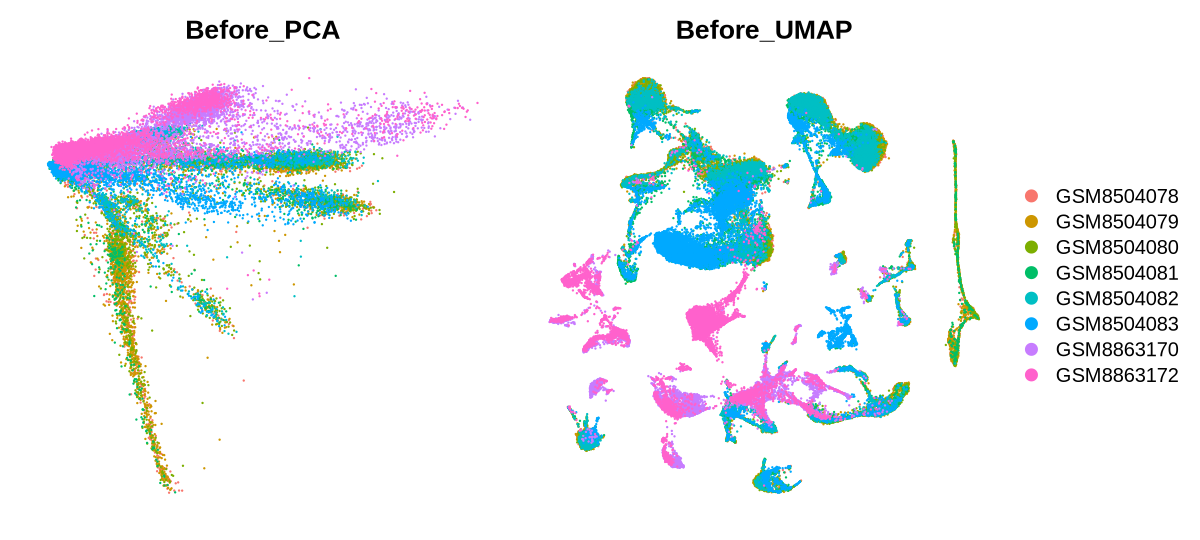

In [16]:
### 3.2 检查批次
options(repr.plot.width = 10, repr.plot.height = 4.5)
p1.compare=wrap_plots(ncol = 2,
                      DimPlot(seurat.data, reduction = "pca", group.by = "sampleID")+NoAxes()+ggtitle("Before_PCA"),
                      DimPlot(seurat.data, reduction = "umap", group.by = "sampleID")+NoAxes()+ggtitle("Before_UMAP"),
                      guides = "collect"
)
p1.compare

Loading required package: Rcpp

Transposing data matrix

Initializing state using k-means centroids initialization



Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony converged after 7 iterations



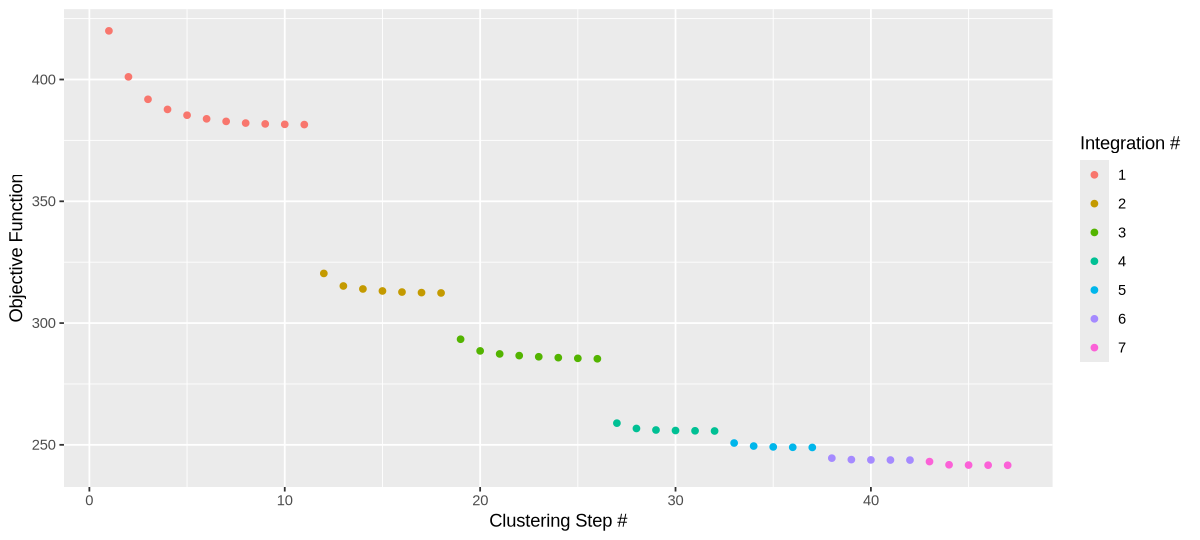

In [17]:
### 4.1 RunHarmony 小样本运行比较快
library(harmony)
seurat.data <- seurat.data %>% RunHarmony("sampleID", plot_convergence = T)

In [18]:
### 去批次之后，还需要再RunUMAP一次更新harmony
seurat.data <- seurat.data %>% 
  RunUMAP(reduction = "harmony", dims = 1:pcSelect, verbose = F)

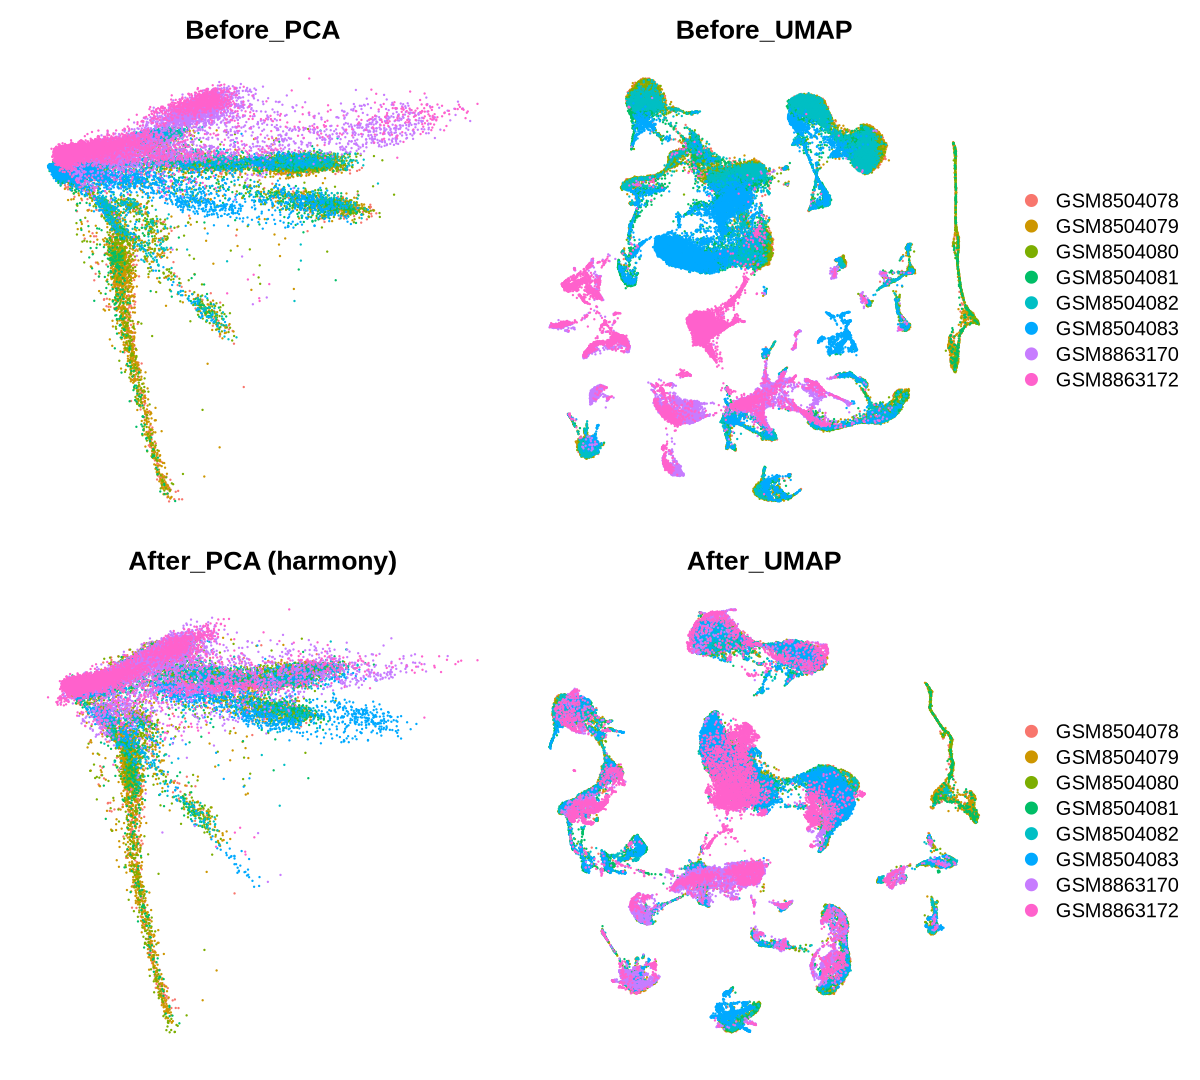

In [19]:
p2.compare=wrap_plots(ncol = 2,
                      DimPlot(seurat.data, reduction = "harmony", group.by = "sampleID")+NoAxes()+ggtitle("After_PCA (harmony)"),
                      DimPlot(seurat.data, reduction = "umap", group.by = "sampleID")+NoAxes()+ggtitle("After_UMAP"),
                      guides = "collect"
)
# p2.compare

options(repr.plot.width = 10, repr.plot.height = 9)
wrap_plots(p1.compare, p2.compare, ncol = 1)


In [20]:
pdf(file="after_hamrmony.pdf",width=10,height=9)
wrap_plots(p1.compare, p2.compare, ncol = 1)
dev.off()

pdf 
  2

### 找合适的resolution

In [21]:
# 对比多种resolution的聚类结果
seurat.data <- FindNeighbors(seurat.data, reduction = "harmony", dims = 1:pcSelect)
for (res in c(0.05,0.1,0.2,0.3,0.5,0.8,1,1.2,1.4,1.5,2)){
  print(res)
  seurat.data <- FindClusters(seurat.data,resolution = res, algorithm = 1)
}

Computing nearest neighbor graph



Computing SNN



[1] 0.05
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 61700
Number of edges: 2193140

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9902
Number of communities: 14
Elapsed time: 14 seconds
[1] 0.1
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 61700
Number of edges: 2193140

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9853
Number of communities: 17
Elapsed time: 14 seconds
[1] 0.2
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 61700
Number of edges: 2193140

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9768
Number of communities: 20
Elapsed time: 16 seconds
[1] 0.3
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 61700
Number of edges: 2193140

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9690
Number of communities:

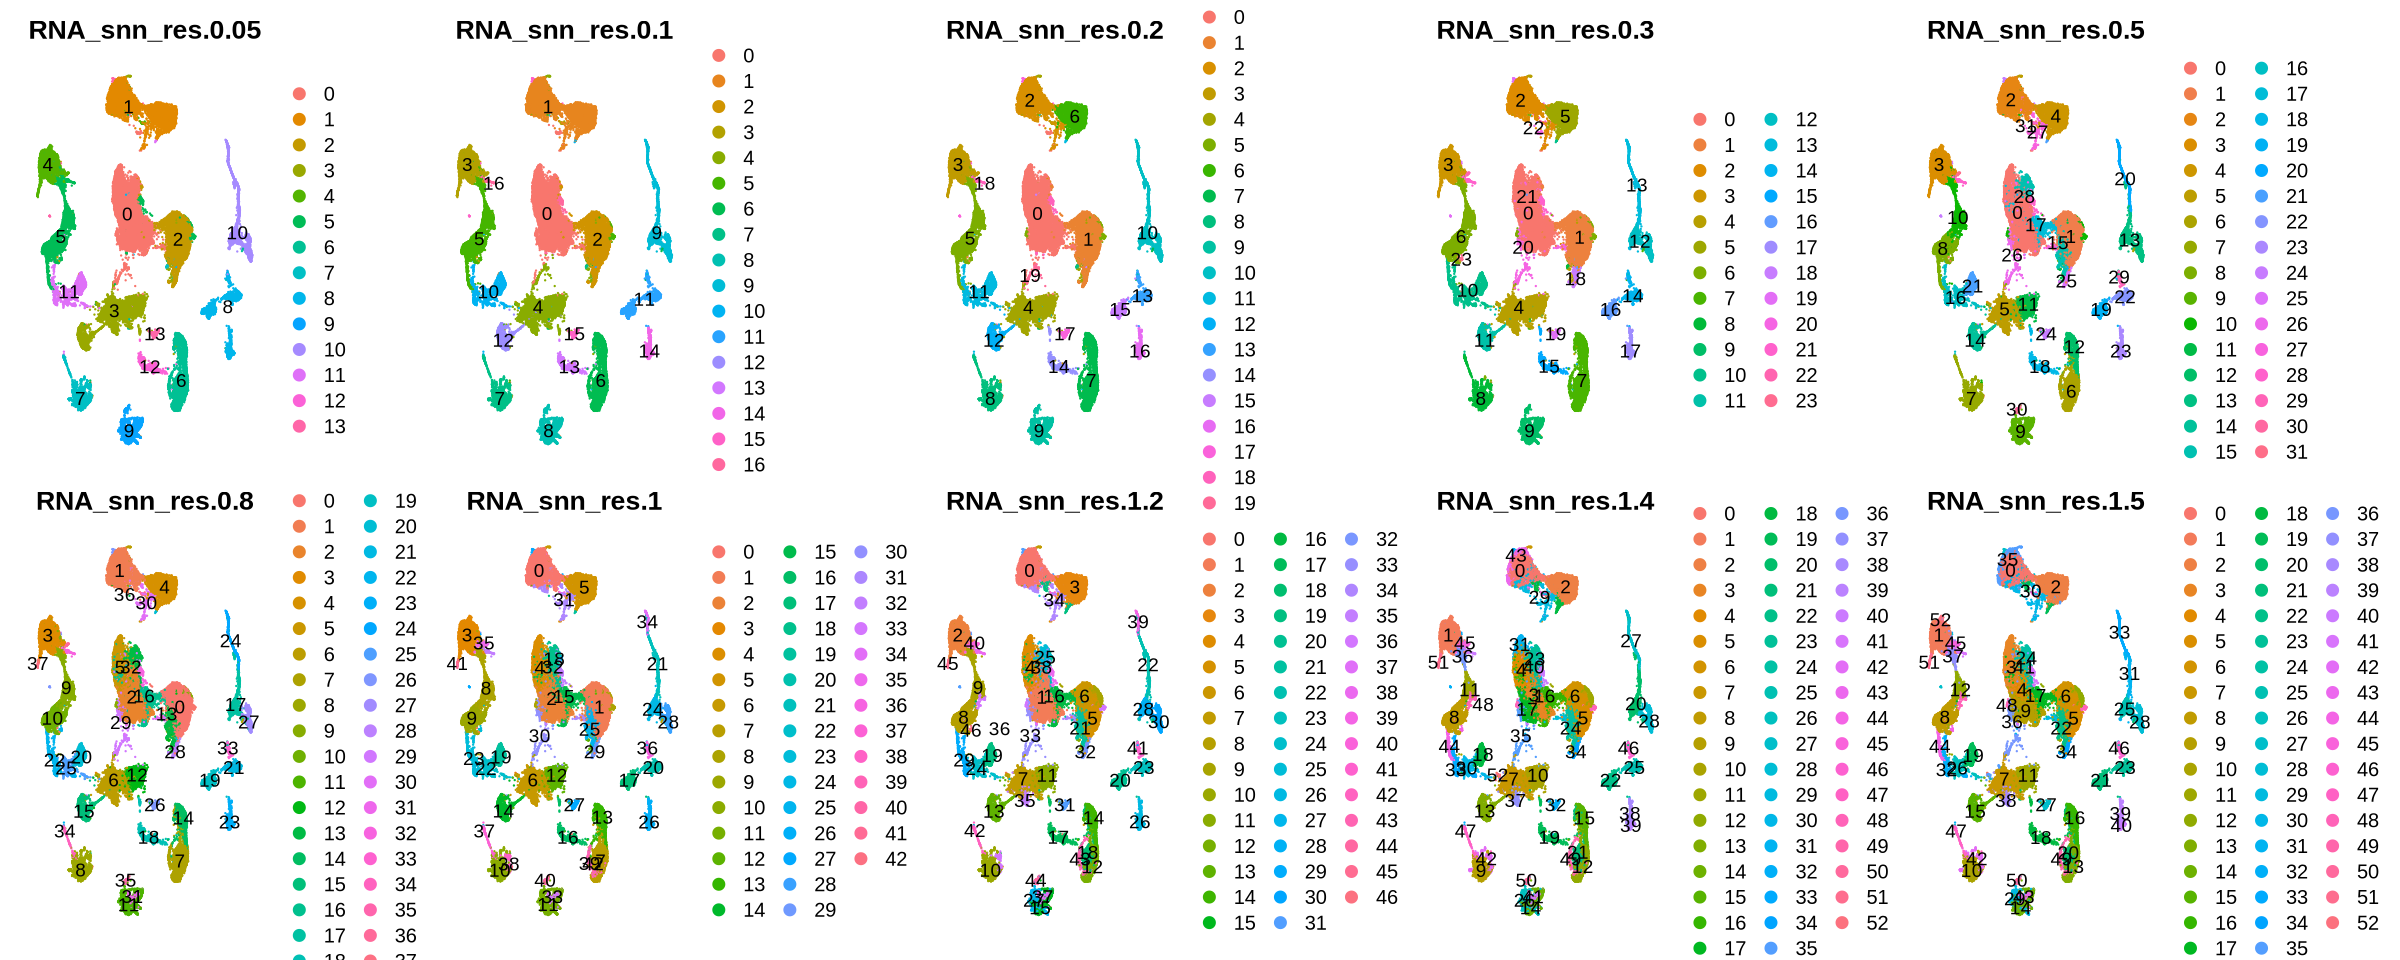

In [22]:
options(repr.plot.width = 20, repr.plot.height = 8)
#umap可视化
cluster_umap <- wrap_plots(ncol = 5,
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.05", label = T) & NoAxes(),  
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.1", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.2", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.3", label = T)& NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.5", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.0.8", label = T) & NoAxes(), 
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1.2", label = T) & NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1.4", label = T)& NoAxes(),
                           DimPlot(seurat.data, reduction = "umap", group.by = "RNA_snn_res.1.5", label = T)& NoAxes()
)
cluster_umap

In [23]:
Idents(seurat.data) <- seurat.data@meta.data$RNA_snn_res.0.5

In [24]:
pdf(file="07.Umap_0.5.pdf",width=6.5,height=6)
# 默认用seurat_clusters列（最后一次聚类得到的列）
DimPlot(seurat.data, reduction = "umap", label = TRUE) & NoAxes()
dev.off()

pdf 
  2

In [25]:
#qs速度快
#install.packages('qs')
library(qs)
system.time({
    qsave(seurat.data,file = "./Outdata/Cluster_no_annotion.qs") 
})

   user  system elapsed 
 22.773   2.166  27.165 

### 主要细胞类型注释

In [47]:
# 读取未注释的数据
seurat.data = qread(file = "./Outdata/Cluster_no_annotion.qs")

In [17]:
# # 将 RNA 表达矩阵的基因名称转换为大写
# rownames(seurat.data@assays$RNA@counts) = toupper(rownames(seurat.data@assays$RNA@counts))
# rownames(seurat.data@assays$RNA@data) = toupper(rownames(seurat.data@assays$RNA@data))

Warning message:
“The following requested variables were not found: Fcgr3b”


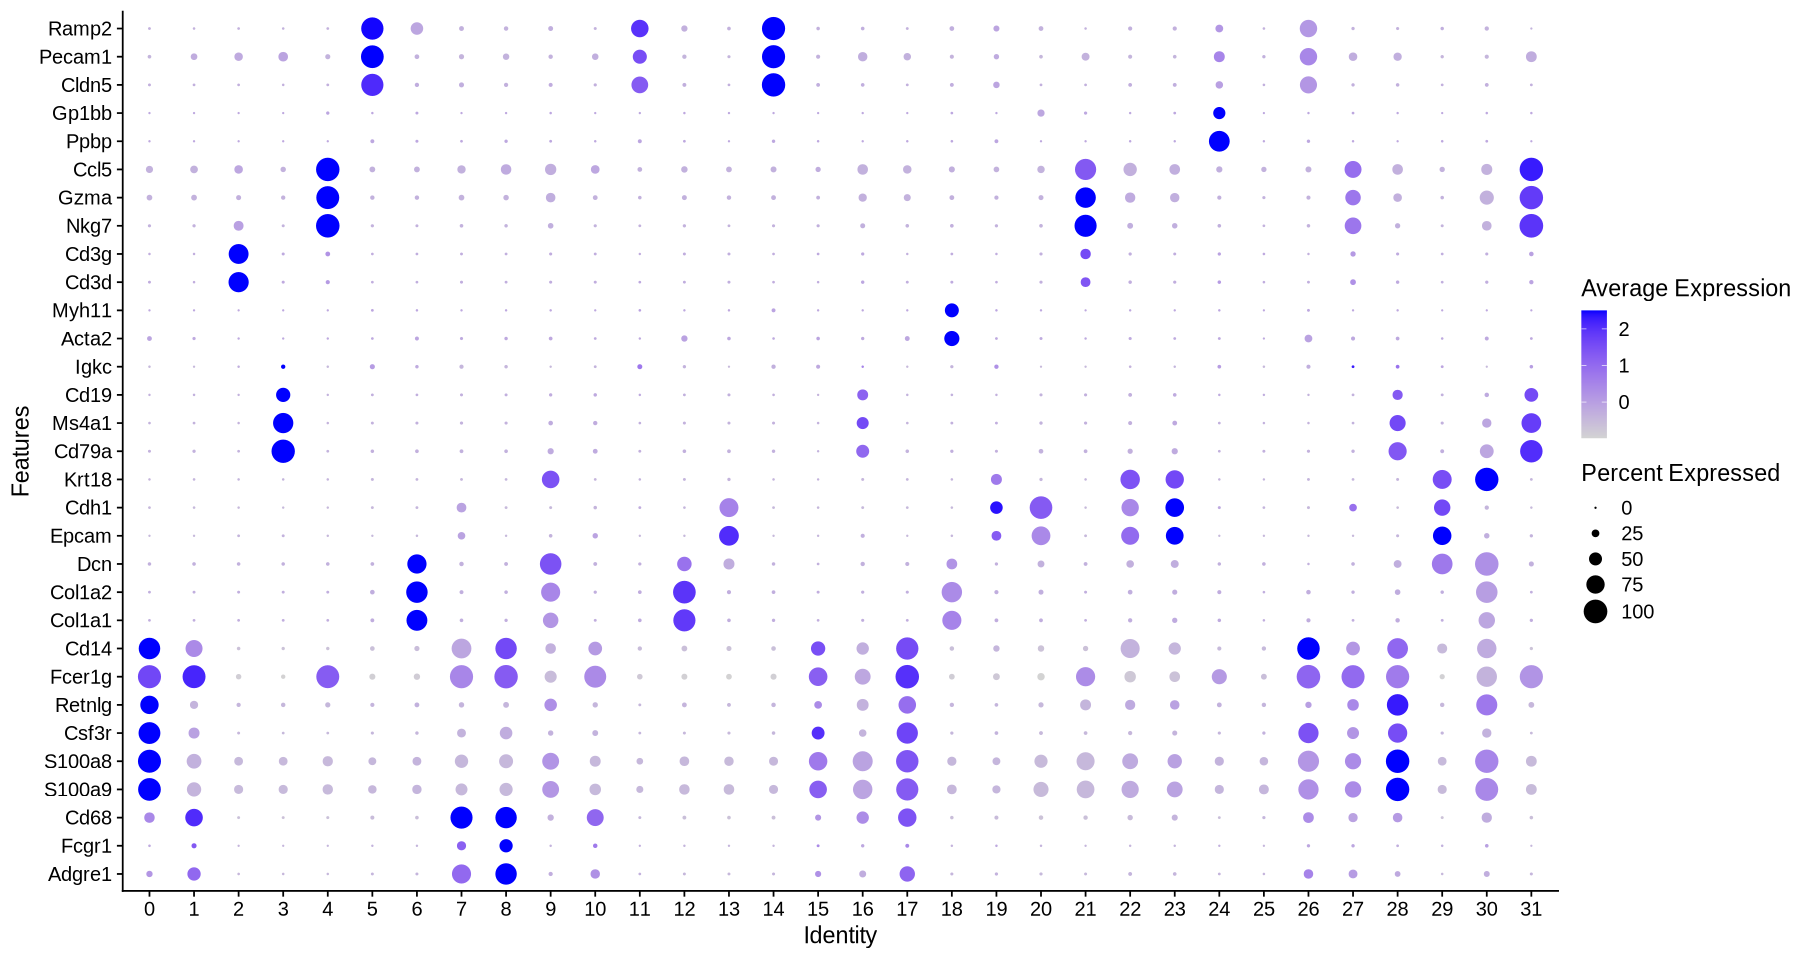

In [37]:
### 基因名称区分大小写，需要有assay中的基因名称大小写一直

# 默认seurat_clusters列为RNA_snn_res.0.2
Idents(seurat.data) <- seurat.data@meta.data$RNA_snn_res.0.5

options(repr.plot.width = 15, repr.plot.height = 8)

# # 文章PMID:39822976，GSE276682数据集！！！
# check_genes = c(
#   "S100a9","Retnlg","Fcer1g",   # 髓系细胞 (Myeloid_cells)
#   "Cd79a","Ms4a1","Cd19",   # B细胞 (B_cells)
#   "Cd3d","Cd3g",   # T细胞 (T_cells)
#   "Nkg7","Gzma","Ccl5",   # NK细胞 (NK_cells)
#   "Col1a1","Col1a2","Dcn",   # 成纤维细胞 (Fibroblasts)
#   "Cldn5","Pecam1","Ramp2",   # 内皮细胞 (Endothelial cells)
#   "Epcam","Cdh1","Krt18"   # 上皮细胞 (Epithelial cells)
# )

# #梦琪脓毒症Marker！！！

# check_genes = c("Adgre1","Fcgr1","Cd68", # 巨噬细胞
#                 "Pecam1","Vwf",'Emcn',# 内皮细胞
#                 "Tnni3", "Mb", "Myl3", # 心肌细胞
#                 "S100a9", "S100a8", "Mki67" #中性粒细胞
#                 "Cd79a", "Igkc", #B细胞
#                 "Acta2", "Myh11", #平滑肌细胞
#                 "Cd3g","Gzma","Ccl5", #NK/T细胞
#                 "Rgs5","Kcnj8", #周细胞
#                 "Kcna2","Ank3","Chl1", #神经元
#                 'Col1a1','Col1a2' #成纤维细胞
# )


# 合并以上两者
check_genes = c(
                "Adgre1","Fcgr1","Cd68", # 巨噬细胞
                "S100a9", "S100a8",'Csf3r',"Fcgr3b", #"Mki67", #中性粒细胞
                # "Cpa3","Hpgds","Ms4a2", # 肥大细胞
                # "Clec10a","Clec4c", #DC cells
                "Retnlg","Fcer1g","Cd14",   # 髓系细胞 (Myeloid_cells)  需要进一步细分巨噬细胞、中性粒细胞
                "Col1a1","Col1a2","Dcn",# 成纤维细胞 Fibroblast
                "Epcam","Cdh1","Krt18",   # 上皮细胞 (Epithelial cells)
                # "Tnni3", "Mb", "Myl3", # 心肌细胞
                
                "Cd79a", "Ms4a1","Cd19","Igkc", #B细胞
                "Acta2", "Myh11", #平滑肌细胞 Smooth muscle cells
                "Cd3d","Cd3g", #T细胞
                "Nkg7","Gzma","Ccl5",   # NK细胞 (NK_cells)
                # "Rgs5","Kcnj8", #周细胞
                # "Kcna2","Ank3","Chl1", #神经元
                "Ppbp","Gp1bb", # Platelets
                # 'Mki67','Top2a', #Cell cycling
                
                "Cldn5","Pecam1","Ramp2"   # 内皮细胞 (Endothelial cells)
)



DotPlot(object = seurat.data, features = check_genes, 
        assay = "RNA",scale = T) + coord_flip()

### 其他细胞类型注释

In [ ]:
# options(repr.plot.width = 15, repr.plot.height = 8)
# ## 红细胞和增殖细胞
# check_genes = c("Hbb","Hba1","Hba2", # 红细胞,Erythroid cells
#                 "Ppbp","Gp1bb", # Platelets
#                 'Mki67','Top2a' #Cell cycling
# )
# DotPlot(object = seurat.data, features = check_genes, 
#         assay = "RNA",scale = T) + coord_flip()


# options(repr.plot.width = 15, repr.plot.height = 8)
# check_genes = c("Rgs1","Ptprc",'Tyrobp', #Leukocytes (Leu) 
#                 'Cd3d','Cd3e',"Cd3g","Cd2",'Trac','Il32', #T cells
#                 'Sell',"Ccr7","Lef1","Tcf7",'Il7r', #Naive
#                  "Gzma", "Gzmb","Ifng","Prf1","Gnly", #Effect/cytotoxic
#                 'Cd4','Cd40lg','Cd8a','Cd8b','Il2ra','Foxp3',
#                 "Nkg7","Klrd1","Ifit1", #NK cells
#                 "Ighm","Cd22","Cd79a","Cd19","Ms4a1","Sdc1", #B cells
#                 "Jchain","Mzb1","Prdm1","Igj" #Plasma cells
# )
# DotPlot(object = seurat.data, features = check_genes,assay = "RNA",scale = T) + 
#     coord_flip()


# options(repr.plot.width = 15, repr.plot.height = 8)
# check_genes = c("Rgs1","Ptprc",'Tyrobp', #Leukocytes (Leu) 
#                 'Cd3d','Cd3e',"Nkg7",
#                 'Cd68',"Hla-dqb1","Hla-drb1", #MNP,mononuclear phagocytes
#                 "Apoe","C1qa",'C1qb',#Macrophages
#                 "Itgax","Cd14","Fcgr3a","S100a8","Mmp19",#Monocyte 
#                 "Clec10a","Clec4c", #DC cells
#                 "Irf8","Clec9a", "Flt3",#C10_cCD1_CLEC9A IDO1+
#                 "Cd1e","Cd1c","Fcgr1a","Sirpa", "Mafb", #C6_cCD2_CD1C
#                 "Ccr7","Lamp3","Fscn1", "Ido1","Ido2", #DC3 #C11_cDC3_LAMP3
#                 "Lilra4", "Slc32a1","Shd","Lrrc26","Pacsin1","Il3ra", #pDCs C9_pDC_LILRA4 GZMB+
#                 "Kit","Fcer1g","Gata2",'Tpsb2','Ms4a2','Tpsab1','Eng','Enpp3', #Mast cells
#                 "Csf3r","S100a9","Fcgr3b","Alpl","Cxcr1",#Neutrophils
#                 "Olr1","Ldha","Il1rn","Cd44", #PMN-MDSC
#                 "Cxcr2","Adgrg3","Cmtm2","Prok2","Mme","Mmp25",
#                 "Tnfrsf10c","Ceacam8" #Neutrophils
# )
# DotPlot(object = seurat.data, features = check_genes,assay = "RNA",scale = T) + 
#     coord_flip()


# options(repr.plot.width = 15, repr.plot.height = 8)
# check_genes = c("Ackr1",'Cldn5',"Pecam1","Igfbp7",'Sele','Hmox1','Rgs1','Cd200','Vwf','Eng','Cdh5', #Endothelia
#                   "Mt1a","Myh11",#Myofibroblast and Smooth muscle
#                   "Tpm2",'Myl9','Egfl7','Pln', #Smooth muscle (SM)
#                   "Gem","Gja4",#Myofibroblast
#                   "Dcn","Apod","Vim","Lum",'Fbln1','Ptgds','Cfd','Sri','Tagln2','Dpt','Tnfaip6', #Fibroblas (Fib)
#                   'Acta2', #Fibroblas (Fib) & Smooth muscle (SM)
#                   "Rgs5","Notch3","Pdgfrb","Thy1","Ndufa4l2",  #pericytes
#                  "Myl1","Mylpf","Myog","Myf5","Myod1","Des","Pax7", #myoblasts
#                 'Epcam',#Epithelial
#                 "Krt4", "Krt13"
#   )	
# DotPlot(object = seurat.data, features = check_genes,assay = "RNA",scale = T) + 
#     coord_flip()


In [38]:
check_genes = c(
                "Adgre1","Fcgr1","Cd68", # 巨噬细胞
                # "Cpa3","Hpgds","Ms4a2", # 肥大细胞
                # "Clec10a","Clec4c", #DC cells
                "Retnlg","Fcer1g","Cd14",   # 髓系细胞 (Myeloid_cells)  需要进一步细分巨噬细胞、中性粒细胞
                "Col1a1","Col1a2","Dcn",# 成纤维细胞 Fibroblast
                "Epcam","Cdh1","Krt18",   # 上皮细胞 (Epithelial cells)
                # "Tnni3", "Mb", "Myl3", # 心肌细胞
                "S100a9", "S100a8",'Csf3r',"Fcgr3b", #"Mki67", #中性粒细胞
                "Cd79a", "Ms4a1","Cd19","Igkc", #B细胞
                "Acta2", "Myh11", #平滑肌细胞 Smooth muscle cells
                "Cd3d","Cd3g", #T细胞
                "Nkg7","Gzma","Ccl5",   # NK细胞 (NK_cells)
                # "Rgs5","Kcnj8", #周细胞
                # "Kcna2","Ank3","Chl1", #神经元
                "Ppbp","Gp1bb", # Platelets
                # 'Mki67','Top2a', #Cell cycling
                
                "Cldn5","Pecam1","Ramp2"   # 内皮细胞 (Endothelial cells)
)

###分配细胞名称
celltype=data.frame(ClusterID=0:38,celltype='NA')

# ## Neutrophils
celltype[celltype$ClusterID %in% c(0,15,26,28),2]='Neutrophils' #CRL

# ## Macrophage
celltype[celltype$ClusterID %in% c(1,7,8,10),2]='Macrophage' #CRL

## Myeloid_cells
celltype[celltype$ClusterID %in% c(17,25),2]='Other Myeloid cells' #CRL

## Fibroblast
celltype[celltype$ClusterID %in% c(6,9,12,30),2]='Fibroblast' #CRL

## Epithelial_cells
celltype[celltype$ClusterID %in% c(13,19,20,22,23,29),2]='Epithelial cells' #CRL

## B_cells
celltype[celltype$ClusterID %in% c(3,16),2]='B cells' # 

## Smooth muscle cells
celltype[celltype$ClusterID %in% c(18),2]='Smooth muscle cells' #CRL


## T_cells
celltype[celltype$ClusterID %in% c(2),2]='T cells'  #CRL

## NK_cells
celltype[celltype$ClusterID %in% c(4,21,27,31),2]='NK cells'  #CRL

## Endothelial_cells
celltype[celltype$ClusterID %in% c(5,11,14,26),2]='Endothelial cells' #CRL

# Platelets
celltype[celltype$ClusterID %in% c(24),2]='Platelets' #CRL




colnames(celltype) = c("ClusterID","celltype_main")
seurat.data@meta.data$celltype = "NA"
for(i in 1:nrow(celltype)){
  seurat.data@meta.data[which(seurat.data@active.ident == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}
table(seurat.data@meta.data$celltype)


            B cells   Endothelial cells    Epithelial cells          Fibroblast 
               6010                6353                4365                6096 
         Macrophage         Neutrophils            NK cells Other Myeloid cells 
              13125               11206                5380                1375 
          Platelets Smooth muscle cells             T cells 
                533                 890                6367 

In [39]:
pdf(file="09.Umap_annotion_0.5.pdf",width=12,height=10)
DimPlot(seurat.data, reduction = "umap", group.by = "celltype", label = T)& NoAxes()
dev.off()

pdf 
  2

In [40]:
head(seurat.data@meta.data)
Idents(seurat.data) <- seurat.data@meta.data$celltype
table(seurat.data@meta.data$celltype)

,orig.ident,nCount_RNA,nFeature_RNA,sampleID,group,percent.mt,RNA_snn_res.0.05,seurat_clusters,RNA_snn_res.0.1,RNA_snn_res.0.2,RNA_snn_res.0.3,RNA_snn_res.0.5,RNA_snn_res.0.8,RNA_snn_res.1,RNA_snn_res.1.2,RNA_snn_res.1.4,RNA_snn_res.1.5,RNA_snn_res.2,celltype
,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<chr>
GSM8504078_AAACCCAAGATTGAGT-1,GSM8504078,61497,5735,GSM8504078,CRL,3.8131941,10,35,9,10,13,20,24,34,39,27,33,35,Epithelial cells
GSM8504078_AAACCCACATGTTTGG-1,GSM8504078,546,338,GSM8504078,CRL,0.5494505,2,24,2,1,1,1,13,2,21,24,22,24,Macrophage
GSM8504078_AAACCCAGTAGATCCT-1,GSM8504078,2981,1158,GSM8504078,CRL,0.7380074,0,5,0,0,0,0,2,2,1,3,4,5,Neutrophils
GSM8504078_AAACCCAGTATCGTGT-1,GSM8504078,1637,744,GSM8504078,CRL,0.4886988,0,3,0,0,0,0,5,4,4,4,3,3,Neutrophils
GSM8504078_AAACCCAGTGTGTCCG-1,GSM8504078,9850,2636,GSM8504078,CRL,4.6395939,2,6,2,1,1,1,0,1,6,6,6,6,Macrophage
GSM8504078_AAACCCATCAACCTCC-1,GSM8504078,7160,1968,GSM8504078,CRL,2.2346369,2,6,2,1,1,1,0,1,6,6,6,6,Macrophage



            B cells   Endothelial cells    Epithelial cells          Fibroblast 
               6010                6353                4365                6096 
         Macrophage         Neutrophils            NK cells Other Myeloid cells 
              13125               11206                5380                1375 
          Platelets Smooth muscle cells             T cells 
                533                 890                6367 

In [41]:
## 2.5 保存数据
qsave(seurat.data, file = "./Outdata/Step3.Cluster_annotion.qs")

### 按照指定细胞类型顺序绘制Marker基因图

In [42]:
# 按照 check_genes 从下到上的顺序，确定细胞类型顺序
check_genes = c(
                "Adgre1","Fcgr1","Cd68", # 巨噬细胞
                # "Cpa3","Hpgds","Ms4a2", # 肥大细胞
                # "Clec10a","Clec4c", #DC cells
                "Retnlg","Fcer1g","Cd14",   # 髓系细胞 (Myeloid_cells)  需要进一步细分巨噬细胞、中性粒细胞
                "Col1a1","Col1a2","Dcn",# 成纤维细胞 Fibroblast
                "Epcam","Cdh1","Krt18",   # 上皮细胞 (Epithelial cells)
                # "Tnni3", "Mb", "Myl3", # 心肌细胞
                "S100a9", "S100a8",'Csf3r', #"Mki67", #中性粒细胞 Neutrophils
                "Cd79a", "Ms4a1","Cd19","Igkc", #B细胞
                "Acta2", "Myh11", #平滑肌细胞 Smooth muscle cells
                "Cd3d","Cd3g", #T细胞
                "Nkg7","Gzma","Ccl5",   # NK细胞 (NK_cells)
                # "Rgs5","Kcnj8", #周细胞
                # "Kcna2","Ank3","Chl1", #神经元
                "Ppbp","Gp1bb", # Platelets
                # 'Mki67','Top2a', #Cell cycling
                
                "Cldn5","Pecam1","Ramp2"   # 内皮细胞 (Endothelial cells)
)

# 按照指定顺序定义因子水平
celltype_order <- c(
  "Endothelial cells",
  "Platelets",
  "NK cells",
  "T cells",
  "Smooth muscle cells",
  "B cells",
  "Neutrophils",
  "Epithelial cells",
  "Fibroblast",
  "Macrophage",
  "Other Myeloid cells"

)

# 确保 celltype 列为因子
seurat.data$celltype <- factor(seurat.data$celltype, levels = celltype_order)

# DotPlot
p <- DotPlot(
    seurat.data, 
    features = check_genes, 
    assay = "RNA", 
    scale = TRUE,
    group.by = "celltype"
) + 
  coord_flip() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# 保存
pdf(file="06.markerBubble.reordered.pdf", width=10, height=10)
print(p)
dev.off()


pdf 
  2

In [ ]:


# # 绘制marker的小提琴图
# pdf(file="06.markerViolin.pdf",width=10,height=6)
# VlnPlot(object = seurat.data, features = c("Gzma","Ccl5"))
# dev.off()


# #绘制marker在各个cluster的散点图
# pdf(file="06.markerScatter.pdf",width=10,height=6)
# FeaturePlot(object = seurat.data, features = c("Gzma","Ccl5"),cols = c("green", "red"))
# dev.off()

# #绘制marker在各个cluster的气泡图
# pdf(file="06.markerBubble.pdf",width=12,height=6)
# cluster10Marker=c("Gzma","Ccl5")
# DotPlot(object = seurat.data, features = cluster10Marker)
# dev.off()


pdf 
  2

pdf 
  2

## 计算每种细胞类型在不同组的差异基因

In [43]:
seurat.data = qread(file = "./Outdata/Step3.Cluster_annotion.qs")
seurat.obj = seurat.data

In [44]:
library(Seurat)
library(dplyr)
library(ggplot2)
library(ggrepel)

# 设置 celltype 为身份
Idents(seurat.obj) <- "celltype"
celltypes <- unique(seurat.obj$celltype)

# celltypes = c("Unknown","Smooth muscle cells")  # 只对 Unknown 进行差异分析

deg.list <- list()

# 循环每个 celltype
for (ct in celltypes) {
  message("Processing: ", ct)
  subset.obj <- subset(seurat.obj, idents = ct)
  Idents(subset.obj) <- "group"
  
  deg <- FindMarkers(
    subset.obj,
    ident.1 = "ALI",
    ident.2 = "CRL",
    logfc.threshold = 0,
    min.pct = 0.1
  )
  
  deg$gene <- rownames(deg)
  deg$celltype <- ct
  deg$direction <- ifelse(deg$avg_log2FC > 0, "ALI", "CRL")
  
  deg.list[[ct]] <- deg
}

# 合并所有 celltype 结果
deg.all <- bind_rows(deg.list)

# 在每个 celltype 内，取 |log2FC| 最大的前 5 个显著基因
top_genes <- deg.all %>%
  filter(p_val_adj < 0.05) %>%
  group_by(celltype) %>%
  slice_max(order_by = abs(avg_log2FC), n = 5, with_ties = FALSE) %>%
  ungroup()

# 画图：每个 celltype 一个分面
p <- ggplot(deg.all, aes(x = celltype, y = avg_log2FC, color = direction)) +
  geom_jitter(width = 0.3, size = 1.2, alpha = 0.7) +
  scale_color_manual(values = c("ALI" = "red", "CRL" = "blue")) +
  geom_hline(yintercept = 0, linetype = "dashed") +
  geom_text_repel(
    data = top_genes,
    aes(label = gene),
    size = 5,
    fontface = "italic",
    max.overlaps = 20
  ) +
  facet_grid(. ~ celltype, scales = "free_x", space = "free_x") +
  theme_classic(base_size = 14) +
  labs(
    y = "Average log2FoldChange",
    x = "",
    color = "Up in"
  ) +
  theme(
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.text.y = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 16, face = "bold"),
    legend.title = element_text(size = 14, face = "bold"),
    legend.text = element_text(size = 12),
    strip.text.x = element_text(
      size = 14,
      face = "bold",
      angle = 0,       # 设置为水平
      hjust = 0.5      # 居中
    )
  )

pdf(file="DG_figures.pdf",width=20,height=5)
print(p)
dev.off()


Processing: Epithelial cells

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Processing: Macrophage

Processing: Neutrophils

Processing: T cells

Processing: B cells

Processing: NK cells

Processing: Endothelial cells

Processing: Fibroblast

Processing: Other Myeloid cells

Processing: Smooth muscle cells

Processing: Platelets



pdf 
  2

### 计算每个cluster的marker基因

各种reduction都是为了可视化，FindMarkers只用Xount数据不是细胞注释必须的！！！！

## 这里先不进行差异基因分析（因为细胞数量太多，只对细分的组）

In [62]:
# # qread速度很快
# library(qs)
# system.time({
#     seurat.data = qread(file = "./Outdata/Step3.Cluster_annotion.qs")
#            })

   user  system elapsed 
  8.645   3.022  11.676 

In [65]:
# Idents(seurat.data) <- seurat.data@meta.data$celltype

# ##寻找差异表达的特征
# log2FCfilter=1 # 表示2的1次方，即相差两倍
# adjPvalFilter=0.05


# seurat.data.markers <- FindAllMarkers(object = seurat.data,
#                                only.pos = FALSE,
#                                min.pct = 0.25,
#                                logfc.threshold = log2FCfilter)

# top10 <- seurat.data.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

# #绘制差异基因在各个细胞类型的热图（图片有问题）
# pdf(file="06.tsneHeatmap.pdf",width=20,height=8)
# DoHeatmap(seurat.data, features = top10$gene, group.by = "celltype") + NoLegend()
# dev.off()

# save(seurat.data.markers,
#      file = "Step6.celltype.markers.0.3.Rdata")

# sig.markers=seurat.data.markers[(abs(as.numeric(as.vector(seurat.data.markers$avg_log2FC)))>log2FCfilter & as.numeric(as.vector(seurat.data.markers$p_val_adj))<adjPvalFilter),]
# write.table(sig.markers,file="06.markers.xls",sep="\t",row.names=F,quote=F)


In [123]:
# 对这些基因单独进行缩放
# seurat.data <- ScaleData(seurat.data, features = unique(top10$gene))

# #绘制差异基因在   指定   细胞类型的热图（图片有问题）

# top10.sub <- subset(top10, cluster %in% c(
#     "Myeloid cells",
#     "Endothelial cells", "Epithelial cells", 
#     "Unknown"))

# seurat.sub <- subset(seurat.data_ALI, idents = c(
#     "Myeloid cells", 
#     "Endothelial cells","Epithelial cells",
#     "Unknown"))
# pdf(file="06.seurat.sub.pdf",width=10,height=15)
# DoHeatmap(seurat.sub, features = top10.sub$gene)
# dev.off()


Centering and scaling data matrix

